In [ ]:
import csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

# 각각의 데이터 결측치 및 이상치 확인

In [ ]:
#1인가구(거처종류별)#
home1 = pd.read_csv('/content/1인가구(거처종류별).csv', encoding = 'cp949')

In [ ]:
home1.head()

,자치구별,전체소계,전체소계(남자),전체소계(여자),소계(주택),소계(주택남자),소계(주택여자),소계(주택이외의 거처),소계(주택이외의 거처남자),소계(주택이외의 거처여자),...,소계(아파트여자),소계(연립주택),소계(연립주택남자),소계(연립주택여자),소계(다세대주택),소계(다세대주택남자),소계(다세대주택여자),소계(비거주용 건물내 주택),소계(비거주용 건물내 주택남자),소계(비거주용 건물내 주택여자)
0,소계,1489893,698324,791569,1240505,574089,666416,249388,124235,125153,...,214740,23430,9809,13621,275351,122190,153161,47408,26542,20866
1,종로구,27308,13211,14097,21465,10037,11428,5843,3174,2669,...,2321,1110,447,663,4197,1811,2386,916,487,429
2,중구,24544,11654,12890,18406,8370,10036,6138,3284,2854,...,4519,388,162,226,2929,1352,1577,745,419,326
3,용산구,39270,18124,21146,33407,15090,18317,5863,3034,2829,...,4632,823,370,453,7776,3570,4206,662,389,273
4,성동구,44946,22127,22819,39191,19121,20070,5755,3006,2749,...,8553,342,143,199,3805,1785,2020,1806,1024,782


In [ ]:
home1.isnull().sum() #결측치확인 

자치구별                 0
전체소계                 0
전체소계(남자)             0
전체소계(여자)             0
소계(주택)               0
소계(주택남자)             0
소계(주택여자)             0
소계(주택이외의 거처)         0
소계(주택이외의 거처남자)       0
소계(주택이외의 거처여자)       0
소계(단독주택)             0
소계(단독주택남자)           0
소계(단독주택여자)           0
소계(아파트)              0
소계(아파트남자)            0
소계(아파트여자)            0
소계(연립주택)             0
소계(연립주택남자)           0
소계(연립주택여자)           0
소계(다세대주택)            0
소계(다세대주택남자)          0
소계(다세대주택여자)          0
소계(비거주용 건물내 주택)      0
소계(비거주용 건물내 주택남자)    0
소계(비거주용 건물내 주택여자)    0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


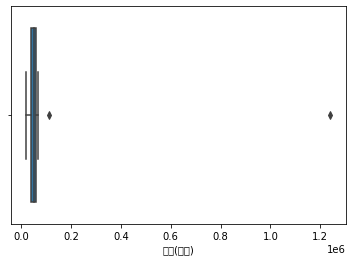

In [ ]:
# box plot
sns.boxplot(x='소계(주택)', data=home1)
plt.show()

In [ ]:
q1=home1['소계(주택)'].quantile(0.25)
q2=home1['소계(주택)'].quantile(0.5)
q3=home1['소계(주택)'].quantile(0.75)
iqr=q3-q1

condition=home1[('소계(주택)')]>q3+1.5*iqr
home1[condition]  #이상치 확인 

,자치구별,전체소계,전체소계(남자),전체소계(여자),소계(주택),소계(주택남자),소계(주택여자),소계(주택이외의 거처),소계(주택이외의 거처남자),소계(주택이외의 거처여자),...,소계(아파트여자),소계(연립주택),소계(연립주택남자),소계(연립주택여자),소계(다세대주택),소계(다세대주택남자),소계(다세대주택여자),소계(비거주용 건물내 주택),소계(비거주용 건물내 주택남자),소계(비거주용 건물내 주택여자)
0,소계,1489893,698324,791569,1240505,574089,666416,249388,124235,125153,...,214740,23430,9809,13621,275351,122190,153161,47408,26542,20866
21,관악구,136255,71434,64821,112627,58960,53667,23628,12474,11154,...,8065,1312,594,718,14969,6995,7974,11112,6501,4611


In [ ]:
newhome1 = home1.drop(0) #소계제거 


In [ ]:
newhome1

,자치구별,전체소계,전체소계(남자),전체소계(여자),소계(주택),소계(주택남자),소계(주택여자),소계(주택이외의 거처),소계(주택이외의 거처남자),소계(주택이외의 거처여자),...,소계(아파트여자),소계(연립주택),소계(연립주택남자),소계(연립주택여자),소계(다세대주택),소계(다세대주택남자),소계(다세대주택여자),소계(비거주용 건물내 주택),소계(비거주용 건물내 주택남자),소계(비거주용 건물내 주택여자)
1,종로구,27308,13211,14097,21465,10037,11428,5843,3174,2669,...,2321,1110,447,663,4197,1811,2386,916,487,429
2,중구,24544,11654,12890,18406,8370,10036,6138,3284,2854,...,4519,388,162,226,2929,1352,1577,745,419,326
3,용산구,39270,18124,21146,33407,15090,18317,5863,3034,2829,...,4632,823,370,453,7776,3570,4206,662,389,273
4,성동구,44946,22127,22819,39191,19121,20070,5755,3006,2749,...,8553,342,143,199,3805,1785,2020,1806,1024,782
5,광진구,66140,31456,34684,57695,27549,30146,8445,3907,4538,...,2994,731,266,465,13392,5679,7713,2674,1475,1199
6,동대문구,65290,32424,32866,53204,26265,26939,12086,6159,5927,...,8864,892,395,497,6404,3107,3297,2349,1255,1094
7,중랑구,60487,29812,30675,55974,27372,28602,4513,2440,2073,...,7174,1064,439,625,9983,4400,5583,1897,1147,750
8,성북구,64985,29018,35967,59090,26245,32845,5895,2773,3122,...,9130,1560,694,866,10436,4463,5973,2714,1286,1428
9,강북구,48428,22386,26042,45110,20366,24744,3318,2020,1298,...,4983,1144,433,711,12016,5040,6976,999,568,431
10,도봉구,37853,16789,21064,34349,14861,19488,3504,1928,1576,...,7987,850,355,495,7848,3315,4533,594,348,246


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 53469 (\N{HANGUL SYLLABLE TAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


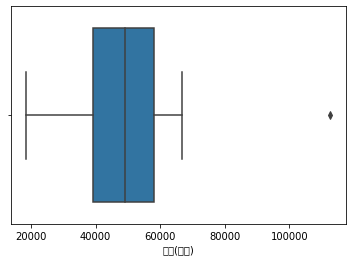

In [ ]:
# box plot
sns.boxplot(x='소계(주택)', data=newhome1)
plt.show()   # 소계 제거후 다시 boxplot , 이상치는 관악구 

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/

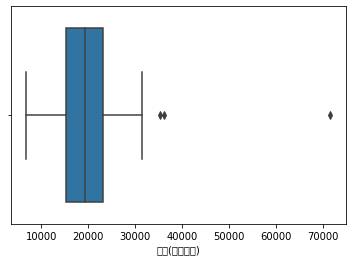

In [ ]:
# box plot
sns.boxplot(x='소계(단독주택)', data=newhome1)
plt.show()   # 이상치 왼쪽부터 차례로 동작, 광진 , 관악

In [ ]:
q1=newhome1['소계(단독주택)'].quantile(0.25)
q2=newhome1['소계(단독주택)'].quantile(0.5)
q3=newhome1['소계(단독주택)'].quantile(0.75)
iqr=q3-q1

condition=newhome1[('소계(단독주택)')]>q3+1.5*iqr
newhome1[condition]  #이상치 확인 

,자치구별,전체소계,전체소계(남자),전체소계(여자),소계(주택),소계(주택남자),소계(주택여자),소계(주택이외의 거처),소계(주택이외의 거처남자),소계(주택이외의 거처여자),...,소계(아파트여자),소계(연립주택),소계(연립주택남자),소계(연립주택여자),소계(다세대주택),소계(다세대주택남자),소계(다세대주택여자),소계(비거주용 건물내 주택),소계(비거주용 건물내 주택남자),소계(비거주용 건물내 주택여자)
5,광진구,66140,31456,34684,57695,27549,30146,8445,3907,4538,...,2994,731,266,465,13392,5679,7713,2674,1475,1199
20,동작구,68231,32345,35886,62899,29278,33621,5332,3067,2265,...,7925,1033,450,583,11330,4924,6406,2450,1327,1123
21,관악구,136255,71434,64821,112627,58960,53667,23628,12474,11154,...,8065,1312,594,718,14969,6995,7974,11112,6501,4611


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


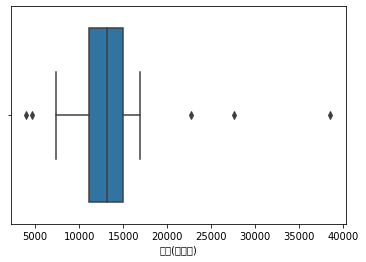

In [ ]:
# box plot
sns.boxplot(x='소계(아파트)', data=newhome1)
plt.show() # 큰 이상치 큰순서대로 노원 강서 강남 / 작은 이상치 작은 순서대로 종로 광진 

In [ ]:
q1=newhome1['소계(아파트)'].quantile(0.25)
q2=newhome1['소계(아파트)'].quantile(0.5)
q3=newhome1['소계(아파트)'].quantile(0.75)
iqr=q3-q1

condition=newhome1[('소계(아파트)')]>q3+1.5*iqr
newhome1[condition]  #이상치 확인 

,자치구별,전체소계,전체소계(남자),전체소계(여자),소계(주택),소계(주택남자),소계(주택여자),소계(주택이외의 거처),소계(주택이외의 거처남자),소계(주택이외의 거처여자),...,소계(아파트여자),소계(연립주택),소계(연립주택남자),소계(연립주택여자),소계(다세대주택),소계(다세대주택남자),소계(다세대주택여자),소계(비거주용 건물내 주택),소계(비거주용 건물내 주택남자),소계(비거주용 건물내 주택여자)
11,노원구,60647,25813,34834,57976,24130,33846,2671,1683,988,...,24607,791,350,441,5402,2629,2773,1016,648,368
16,강서구,94436,42696,51740,66774,30325,36449,27662,12371,15291,...,16552,1053,444,609,20289,9319,10970,937,540,397
23,강남구,71986,31048,40938,59356,24878,34478,12630,6170,6460,...,14351,1194,516,678,14241,6038,8203,2126,1053,1073


In [ ]:
condition=newhome1[('소계(아파트)')]<q1-1.5*iqr
newhome1[condition]  #이상치 확인 

,자치구별,전체소계,전체소계(남자),전체소계(여자),소계(주택),소계(주택남자),소계(주택여자),소계(주택이외의 거처),소계(주택이외의 거처남자),소계(주택이외의 거처여자),...,소계(아파트여자),소계(연립주택),소계(연립주택남자),소계(연립주택여자),소계(다세대주택),소계(다세대주택남자),소계(다세대주택여자),소계(비거주용 건물내 주택),소계(비거주용 건물내 주택남자),소계(비거주용 건물내 주택여자)
1,종로구,27308,13211,14097,21465,10037,11428,5843,3174,2669,...,2321,1110,447,663,4197,1811,2386,916,487,429
5,광진구,66140,31456,34684,57695,27549,30146,8445,3907,4538,...,2994,731,266,465,13392,5679,7713,2674,1475,1199


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 47549 (\N{HANGUL SYLLABLE RIB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython

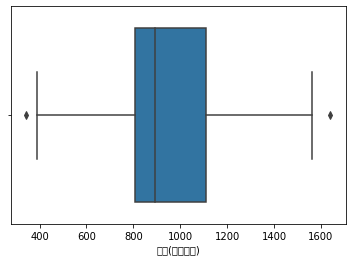

In [ ]:
# box plot
sns.boxplot(x='소계(연립주택)', data=newhome1)
plt.show() #이상치 왼쪽부터 성동 구로  연립주택이라는게 많지않은가구고 강서가 이상치가 아니기에 제거해도 되는 열로 파악 할 수 있음 

In [ ]:
q1=newhome1['소계(연립주택)'].quantile(0.25)
q2=newhome1['소계(연립주택)'].quantile(0.5)
q3=newhome1['소계(연립주택)'].quantile(0.75)
iqr=q3-q1

condition= newhome1[('소계(연립주택)')]>q3+1.5*iqr 
newhome1[condition]  #이상치 확인 

,자치구별,전체소계,전체소계(남자),전체소계(여자),소계(주택),소계(주택남자),소계(주택여자),소계(주택이외의 거처),소계(주택이외의 거처남자),소계(주택이외의 거처여자),...,소계(아파트여자),소계(연립주택),소계(연립주택남자),소계(연립주택여자),소계(다세대주택),소계(다세대주택남자),소계(다세대주택여자),소계(비거주용 건물내 주택),소계(비거주용 건물내 주택남자),소계(비거주용 건물내 주택여자)
17,구로구,54980,27121,27859,40514,19355,21159,14466,7766,6700,...,8847,1640,716,924,7721,3605,4116,892,537,355


In [ ]:
 condition= newhome1[('소계(연립주택)')]<q1- 1.5*iqr 
 newhome1[condition]  #이상치 확인 

,자치구별,전체소계,전체소계(남자),전체소계(여자),소계(주택),소계(주택남자),소계(주택여자),소계(주택이외의 거처),소계(주택이외의 거처남자),소계(주택이외의 거처여자),...,소계(아파트여자),소계(연립주택),소계(연립주택남자),소계(연립주택여자),소계(다세대주택),소계(다세대주택남자),소계(다세대주택여자),소계(비거주용 건물내 주택),소계(비거주용 건물내 주택남자),소계(비거주용 건물내 주택여자)
4,성동구,44946,22127,22819,39191,19121,20070,5755,3006,2749,...,8553,342,143,199,3805,1785,2020,1806,1024,782


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/c

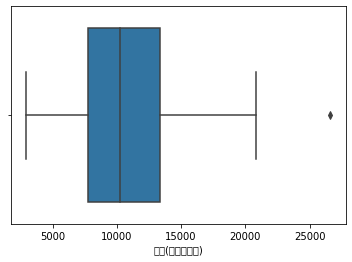

In [ ]:
# box plot
sns.boxplot(x='소계(다세대주택)', data=newhome1)
plt.show() #이상치 송파  이것또한 제거해도 되는 열로 파악됨 

In [ ]:
q1=newhome1['소계(다세대주택)'].quantile(0.25)
q2=newhome1['소계(다세대주택)'].quantile(0.5)
q3=newhome1['소계(다세대주택)'].quantile(0.75)
iqr=q3-q1

condition= newhome1[('소계(다세대주택)')]>q3+1.5*iqr 
newhome1[condition]  #이상치 확인 

,자치구별,전체소계,전체소계(남자),전체소계(여자),소계(주택),소계(주택남자),소계(주택여자),소계(주택이외의 거처),소계(주택이외의 거처남자),소계(주택이외의 거처여자),...,소계(아파트여자),소계(연립주택),소계(연립주택남자),소계(연립주택여자),소계(다세대주택),소계(다세대주택남자),소계(다세대주택여자),소계(비거주용 건물내 주택),소계(비거주용 건물내 주택남자),소계(비거주용 건물내 주택여자)
24,송파구,79262,35267,43995,63425,28071,35354,15837,7196,8641,...,10874,831,328,503,26609,11741,14868,2136,1232,904


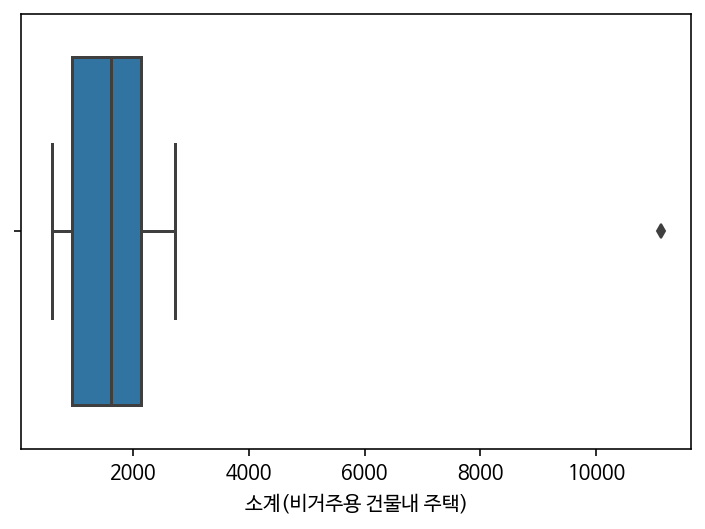

In [ ]:
# box plot
sns.boxplot(x='소계(비거주용 건물내 주택)', data=newhome1)
plt.show() # 이상치: 관악구 

In [ ]:
q1=newhome1['소계(비거주용 건물내 주택)'].quantile(0.25)
q2=newhome1['소계(비거주용 건물내 주택)'].quantile(0.5)
q3=newhome1['소계(비거주용 건물내 주택)'].quantile(0.75)
iqr=q3-q1

condition= newhome1[('소계(비거주용 건물내 주택)')]>q3+1.5*iqr 
newhome1[condition]  #이상치 확인 

,자치구별,전체소계,전체소계(남자),전체소계(여자),소계(주택),소계(주택남자),소계(주택여자),소계(주택이외의 거처),소계(주택이외의 거처남자),소계(주택이외의 거처여자),...,소계(아파트여자),소계(연립주택),소계(연립주택남자),소계(연립주택여자),소계(다세대주택),소계(다세대주택남자),소계(다세대주택여자),소계(비거주용 건물내 주택),소계(비거주용 건물내 주택남자),소계(비거주용 건물내 주택여자)
21,관악구,136255,71434,64821,112627,58960,53667,23628,12474,11154,...,8065,1312,594,718,14969,6995,7974,11112,6501,4611


In [ ]:
def draw_stacked_barchart(df,main_category,sub_category,bar_width = 0.5,fig_width=10,fig_height=10,\
                        bar_type='vertical', is_edge=None, config_bar={}):
   
            
    ## 필요모듈 출력
    import matplotlib.pyplot as plt
    import numpy as np
    import seaborn as sns
    %matplotlib inline
    num_sub_category = len(sub_category) ## 서브 카테고리 개수
    fig = plt.figure(figsize=(fig_width,fig_height)) ## 캔버스 생성
    fig.set_facecolor('white') ## 캔버스 배경색 설정
    ax = fig.add_subplot() ## 그림이 그려질 축을 생성
 
    tick_label = list(df[main_category].unique()) ## 메인 카테고리 라벨 생성
    tick_number = len(tick_label) ## 메인 카테고리 눈금 개수
    tick_coord = np.arange(tick_number) ## 메인 카테고리 x좌표 = 막대기 폭의 중심 x좌표
    colors = sns.color_palette('hls',num_sub_category) ## 막대기 색상 지정
 
    config_tick = dict()
    config_tick['ticks'] = tick_coord ## 메인 카테고리 라벨 x좌표
    config_tick['labels'] = tick_label ## 메인 카테고리 라벨
 
    if is_edge == 'outer': ## 바깥쪽 테두리인 경우 config_bar에서 edgecolor를 지운다.
        edge_color = config_bar['edgecolor']
        del config_bar['edgecolor']
 
    if bar_type == 'vertical': ## 수직 바 차트를 그린다.
        plt.xticks(**config_tick) ## x축 눈금 라벨 생성
        plt.xticks(rotation=45)
        bottom = np.zeros_like(tick_coord) ## 막대기 아래쪽 y좌표 초기값
        for i in range(num_sub_category):
            if is_edge == 'outer': 
                bar = ax.bar(tick_coord, df[sub_category[i]], \
                       bar_width, label=sub_category[i], bottom = bottom, \
                       color=colors[i], **config_bar) ## 바 차트 생성
                for b in bar:
                    x_left = b.get_x() ## 막대기 좌측 하단 x좌표
                    x_right = x_left+bar_width ## 막대기 우측 하단 x좌표
                    y_bottom = b.get_y() ## 막대기 아래쪽 y좌표
                    y_top = y_bottom+b.get_height() ## 막대기 위쪽 y 좌표
                    ## 양쪽 세로 테두리를 그린다.
                    ax.plot([x_left,x_left],[y_bottom,y_top],color=edge_color) 
                    ax.plot([x_right,x_right],[y_bottom,y_top],color=edge_color)
                    if i == num_sub_category-1: ## 마지막에 세로 테두리와 위쪽 테두리를 그린다.
                        ax.plot([x_left,x_right],[y_top,y_top],color=edge_color)
            else:
                bar = ax.bar(tick_coord, df[sub_category[i]], \
                       bar_width, label=sub_category[i], bottom = bottom, \
                       color=colors[i], **config_bar)
            bottom += df[sub_category[i]] ## 막대기 아래쪽 y좌표 업데이트한다.
        plt.legend() ##범례 생성
        plt.show()
    else:
        plt.yticks(**config_tick) ## y축 눈금 라벨 생성
        left = np.zeros_like(tick_coord) ## 좌측 x좌표 초기값
        for i in range(num_sub_category):
            if is_edge == 'outer':
                bar = ax.barh(tick_coord, df[sub_category[i]], \
                       bar_width, label=sub_category[i], left = left, \
                       color=colors[i], **config_bar) ## 바 차트 생성
                for b in bar:
                    y_bottom = b.get_y() ## 막대기 아래쪽 y 좌표
                    y_top = y_bottom + bar_width ## 막대기 위쪽 y좌표
                    x_left = b.get_x() ## 막대기 좌측 하단 x좌표
                    x_right = x_left+b.get_width() ## 막대기 우측 하단 x 좌표
                    ## 위아래 가로 테두리를 그린다.
                    ax.plot([x_left, x_right],[y_bottom, y_bottom],color=edge_color)
                    ax.plot([x_left, x_right],[y_top, y_top],color=edge_color)
                    if i == num_sub_category-1: ## 마지막에 위아래 가로 테두리와 오른쪽 세로 테두리를 그린다.
                        ax.plot([x_right, x_right],[y_top, y_bottom],color=edge_color)
            else:
                ax.barh(tick_coord, df[sub_category[i]], \
                       bar_width, label=sub_category[i], left = left, \
                       color=colors[i], **config_bar)
            left += df[sub_category[i]] ## 좌측 x좌표 업데이트
        plt.legend() ##범례 생성
        plt.show()

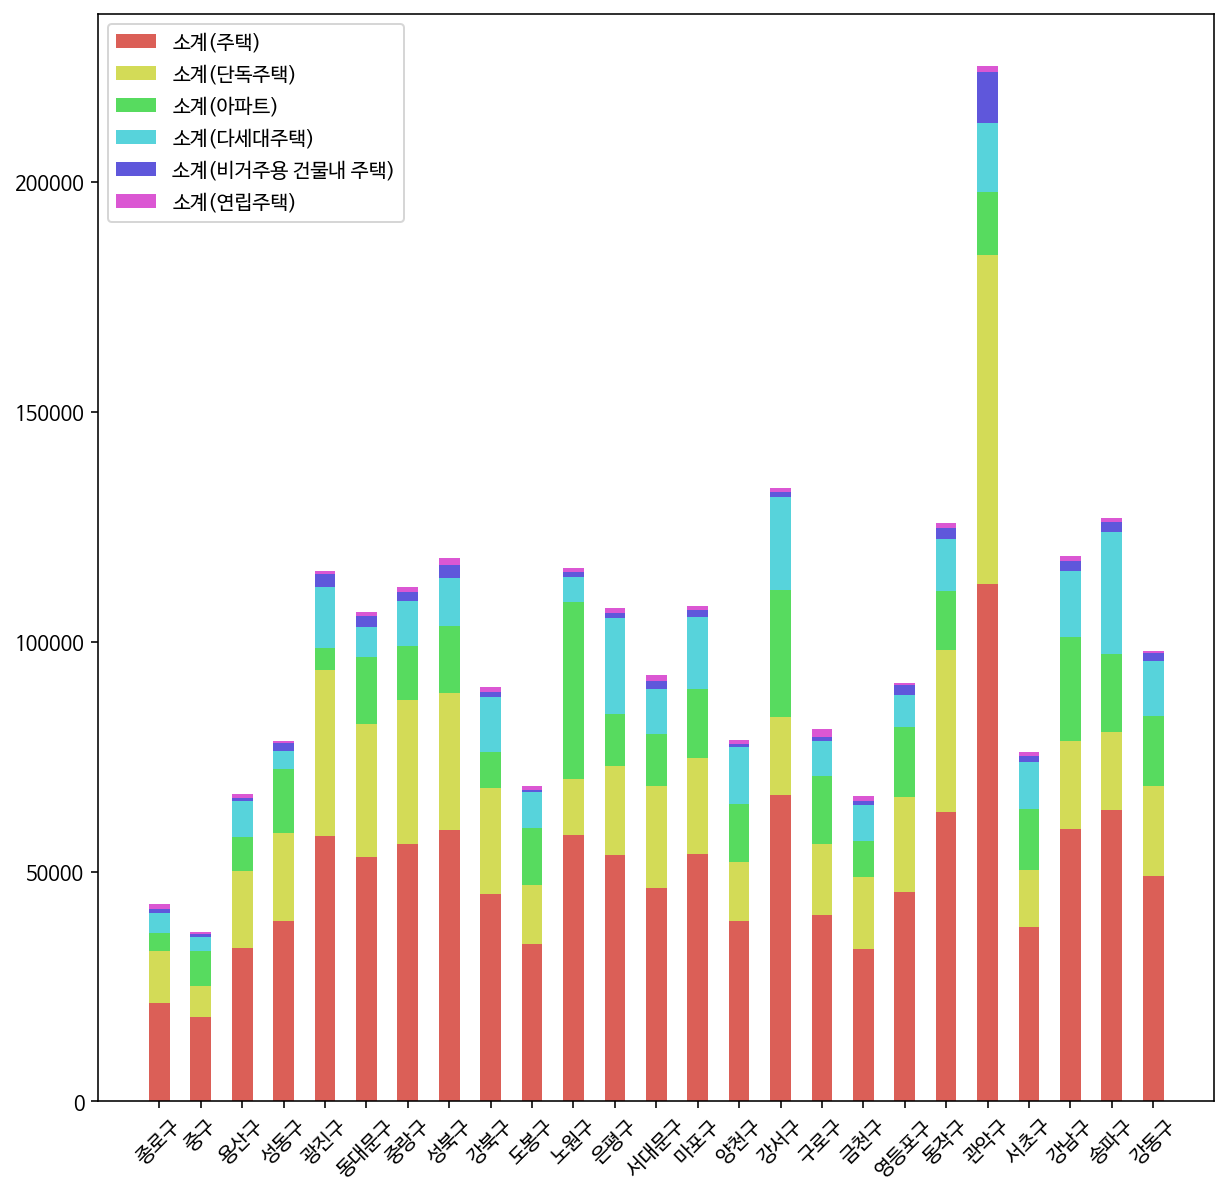

In [ ]:
# 2021년 지역별 1인가구 거주지 통계치 
main_category = '자치구별' ## 메인 카테고리
sub_category = ['소계(주택)','소계(단독주택)','소계(아파트)','소계(다세대주택)','소계(비거주용 건물내 주택)','소계(연립주택)'] ## 서브 카테고리
## 수직 스택 바 차트 -- 기본
draw_stacked_barchart(newhome1,main_category,sub_category, bar_width=0.5, fig_width=10, fig_height=10,\
                        bar_type='vertical') 
#하위 3개 주택들은 제거해도 될것같음 

In [ ]:
#1인가구(연령별)#
home2 = pd.read_csv('/content/1인가구(연령별).csv', encoding = 'cp949')

In [ ]:
home2

,자치구별,전체소계,전체소계(남자),전체소계(여자),소계(20세미만),소계(20세미만남자),소계(20세미만여자),소계(20~24세),소계(20~24세남자),소계(20~24세여자),...,소계(75~79세남자),소계(75~79세여자),소계(80~84세),소계(80~84세남자),소계(80~84세여자),소계(85세이상),소계(85세이상남자),소계(85세이상여자),Unnamed: 49,Unnamed: 50
0,소계,1489893.0,698324.0,791569.0,10687.0,4021.0,6666.0,126833.0,43490.0,83343.0,...,14397.0,42664.0,42020.0,8983.0,33037.0,28407.0,5536.0,22871.0,NaN,NaN
1,종로구,27308.0,13211.0,14097.0,328.0,111.0,217.0,3211.0,1146.0,2065.0,...,366.0,767.0,811.0,207.0,604.0,597.0,145.0,452.0,NaN,NaN
2,중구,24544.0,11654.0,12890.0,268.0,68.0,200.0,2232.0,703.0,1529.0,...,290.0,672.0,762.0,161.0,601.0,555.0,112.0,443.0,NaN,NaN
3,용산구,39270.0,18124.0,21146.0,140.0,41.0,99.0,2620.0,558.0,2062.0,...,296.0,1039.0,1117.0,230.0,887.0,899.0,143.0,756.0,NaN,NaN
4,성동구,44946.0,22127.0,22819.0,534.0,212.0,322.0,4719.0,1917.0,2802.0,...,382.0,1284.0,1252.0,255.0,997.0,773.0,157.0,616.0,NaN,NaN
5,광진구,66140.0,31456.0,34684.0,465.0,169.0,296.0,7334.0,2679.0,4655.0,...,480.0,1284.0,1216.0,256.0,960.0,806.0,130.0,676.0,NaN,NaN
6,동대문구,65290.0,32424.0,32866.0,1198.0,457.0,741.0,11264.0,4323.0,6941.0,...,661.0,1812.0,1827.0,422.0,1405.0,1116.0,251.0,865.0,NaN,NaN
7,중랑구,60487.0,29812.0,30675.0,169.0,67.0,102.0,2565.0,849.0,1716.0,...,774.0,2072.0,1933.0,461.0,1472.0,1197.0,233.0,964.0,NaN,NaN
8,성북구,64985.0,29018.0,35967.0,1396.0,451.0,945.0,11312.0,3902.0,7410.0,...,612.0,2073.0,2101.0,450.0,1651.0,1490.0,277.0,1213.0,NaN,NaN
9,강북구,48428.0,22386.0,26042.0,250.0,64.0,186.0,3151.0,825.0,2326.0,...,738.0,2236.0,2024.0,439.0,1585.0,1138.0,235.0,903.0,NaN,NaN


In [ ]:
home2=home2.drop(26) #오류여서 제거 (빈줄 제거)
home2 = home2.drop(['Unnamed: 49'],axis=1)
home2 = home2.drop(['Unnamed: 50'],axis=1)
newhome2 = home2.drop(0) #소계제거 

In [ ]:
home2.isnull().sum() #결측치없음

자치구별            0
전체소계            0
전체소계(남자)        0
전체소계(여자)        0
소계(20세미만)       0
소계(20세미만남자)     0
소계(20세미만여자)     0
소계(20~24세)      0
소계(20~24세남자)    0
소계(20~24세여자)    0
소계(25~29세)      0
소계(25~29세남자)    0
소계(25~29세여자)    0
소계(30~34세)      0
소계(30~34세남자)    0
소계(30~34세여자)    0
소계(35~39세)      0
소계(35~39세남자)    0
소계(35~39세여자)    0
소계(40~44세)      0
소계(40~44세남자)    0
소계(40~44세여자)    0
소계(45~49세)      0
소계(45~49세남자)    0
소계(45~49세여자)    0
소계(50~54세)      0
소계(50~54세남자)    0
소계(50~54세여자)    0
소계(55~59세)      0
소계(55~59세남자)    0
소계(55~59세여자)    0
소계(60~64세)      0
소계(60~64세남자)    0
소계(60~64세여자)    0
소계(65~69세)      0
소계(65~69세남자)    0
소계(65~69세여자)    0
소계(70~74세)      0
소계(70~74세남자)    0
소계(70~74세여자)    0
소계(75~79세)      0
소계(75~79세남자)    0
소계(75~79세여자)    0
소계(80~84세)      0
소계(80~84세남자)    0
소계(80~84세여자)    0
소계(85세이상)       0
소계(85세이상남자)     0
소계(85세이상여자)     0
dtype: int64

In [ ]:

newhome2['20대'] = newhome2['소계(20~24세)'] +newhome2['소계(25~29세)']

newhome2['30대'] = newhome2['소계(30~34세)'] + newhome2['소계(35~39세)']

newhome2['40대'] = newhome2['소계(40~44세)'] + newhome2['소계(45~49세)']

newhome2['50대'] = newhome2['소계(50~54세)'] + newhome2['소계(55~59세)']

newhome2['60대'] = newhome2['소계(60~64세)'] + newhome2['소계(65~69세)']

newhome2['70대'] = newhome2['소계(70~74세)'] + newhome2['소계(75~79세)']

newhome2['80대이상'] = newhome2['소계(80~84세)'] + newhome2['소계(85세이상)']

newhome2.head()

,자치구별,전체소계,전체소계(남자),전체소계(여자),소계(20세미만),소계(20세미만남자),소계(20세미만여자),소계(20~24세),소계(20~24세남자),소계(20~24세여자),...,소계(85세이상),소계(85세이상남자),소계(85세이상여자),20대,30대,40대,50대,60대,70대,80대이상
1,종로구,27308.0,13211.0,14097.0,328.0,111.0,217.0,3211.0,1146.0,2065.0,...,597.0,145.0,452.0,7799.0,5220.0,3310.0,3540.0,3410.0,2293.0,1408.0
2,중구,24544.0,11654.0,12890.0,268.0,68.0,200.0,2232.0,703.0,1529.0,...,555.0,112.0,443.0,6024.0,5268.0,3093.0,3149.0,3295.0,2130.0,1317.0
3,용산구,39270.0,18124.0,21146.0,140.0,41.0,99.0,2620.0,558.0,2062.0,...,899.0,143.0,756.0,9016.0,10661.0,5730.0,4617.0,4289.0,2801.0,2016.0
4,성동구,44946.0,22127.0,22819.0,534.0,212.0,322.0,4719.0,1917.0,2802.0,...,773.0,157.0,616.0,12628.0,9370.0,5784.0,5543.0,5542.0,3520.0,2025.0
5,광진구,66140.0,31456.0,34684.0,465.0,169.0,296.0,7334.0,2679.0,4655.0,...,806.0,130.0,676.0,21754.0,15802.0,7811.0,7346.0,6992.0,3948.0,2022.0


In [ ]:
df= newhome2[newhome2['자치구별'] == '강서구']


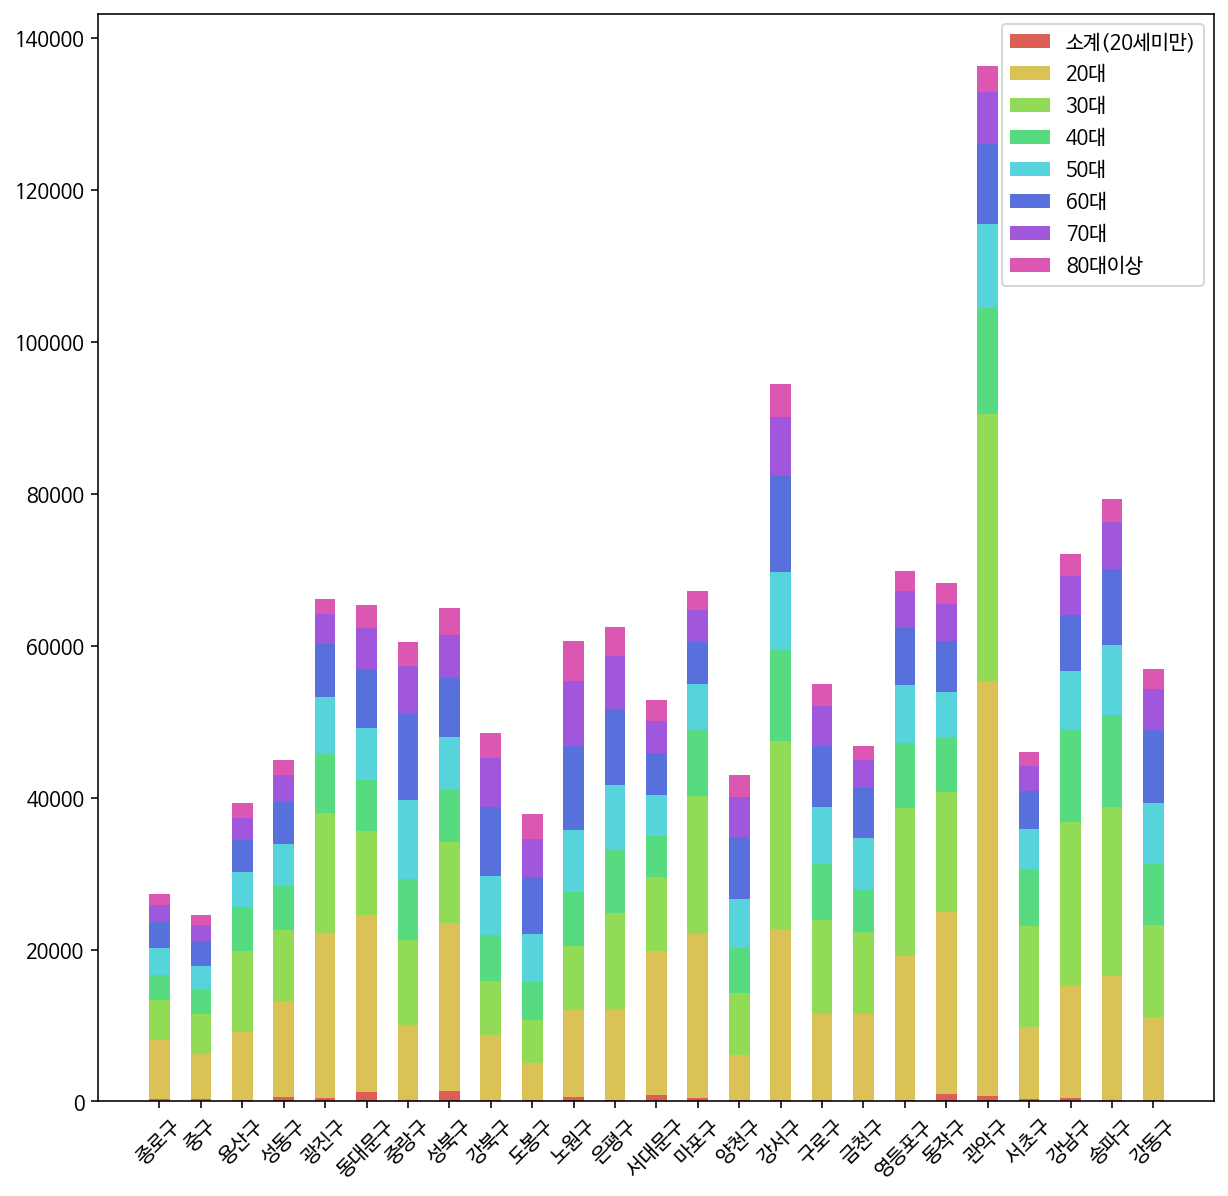

In [ ]:
# 2021년 지역별 1인가구 연령별 통계치 
main_category = '자치구별' ## 메인 카테고리
sub_category = ['소계(20세미만)','20대','30대','40대','50대','60대','70대','80대이상'] ## 서브 카테고리
## 수직 스택 바 차트 -- 기본
draw_stacked_barchart(newhome2,main_category,sub_category, bar_width=0.5, fig_width=10, fig_height=10,\
                        bar_type='vertical')

In [ ]:
#독거노인현황(자치구별))#
home3 = pd.read_csv('/content/독거노인현황(자치구별).csv', encoding = 'cp949')

In [ ]:
home3

,자치구별,전체소계,전체소계(남자),전체소계(여자),소계(국민기초생활보장 수급권자),소계(국민기초생활보장 수급권자남자),소계(국민기초생활보장 수급권자여자),소계(저소득노인),소계(저소득노인남자),소계(저소득노인여자),소계(일반),소계(일반남자),소계(일반여자)
0,소계,392351,128434,263917,110183,40024,70159,14471,3759,10712,267697,84651,183046
1,종로구,8573,3385,5188,1839,975,864,337,122,215,6397,2288,4109
2,중구,7553,3028,4525,2168,1028,1140,265,67,198,5120,1933,3187
3,용산구,11170,3873,7297,2650,1153,1497,345,118,227,8175,2602,5573
4,성동구,11231,3644,7587,2985,1129,1856,352,78,274,7894,2437,5457
5,광진구,12159,3982,8177,3164,1152,2012,366,80,286,8629,2750,5879
6,동대문구,17040,6118,10922,5271,2323,2948,493,132,361,11276,3663,7613
7,중랑구,19260,6736,12524,7074,2551,4523,1366,376,990,10820,3809,7011
8,성북구,18225,5551,12674,4725,1627,3098,698,163,535,12802,3761,9041
9,강북구,25195,8311,16884,5984,2111,3873,1039,237,802,18172,5963,12209


In [ ]:
home3.isnull().sum() #결측치 확인 
newhome3= home3.drop(0) #소계제거 

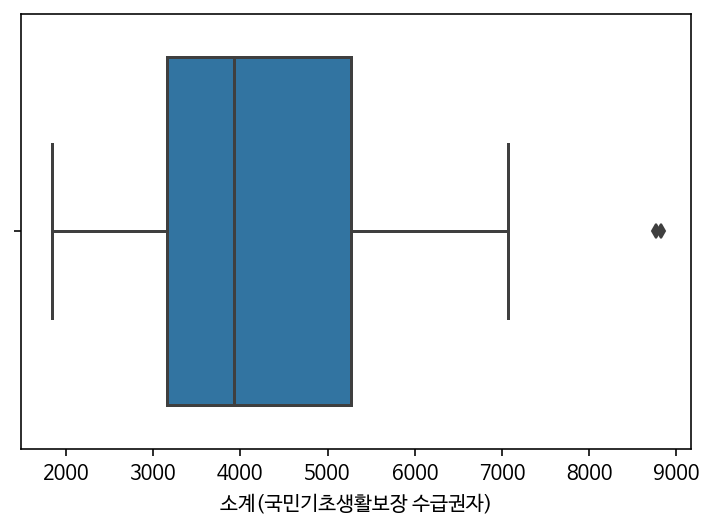

In [ ]:
# box plot
sns.boxplot(x='소계(국민기초생활보장 수급권자)', data=newhome3)
plt.show()  #이상치 순서대로  노원 강서 

In [ ]:
q1=newhome3['소계(국민기초생활보장 수급권자)'].quantile(0.25)
q2=newhome3['소계(국민기초생활보장 수급권자)'].quantile(0.5)
q3=newhome3['소계(국민기초생활보장 수급권자)'].quantile(0.75)
iqr=q3-q1

condition= newhome3[('소계(국민기초생활보장 수급권자)')]>q3+1.5*iqr 
newhome3[condition]  #이상치 확인 

,자치구별,전체소계,전체소계(남자),전체소계(여자),소계(국민기초생활보장 수급권자),소계(국민기초생활보장 수급권자남자),소계(국민기초생활보장 수급권자여자),소계(저소득노인),소계(저소득노인남자),소계(저소득노인여자),소계(일반),소계(일반남자),소계(일반여자)
11,노원구,23770,6787,16983,8770,2709,6061,830,184,646,14170,3894,10276
16,강서구,22863,7570,15293,8818,3150,5668,698,228,470,13347,4192,9155


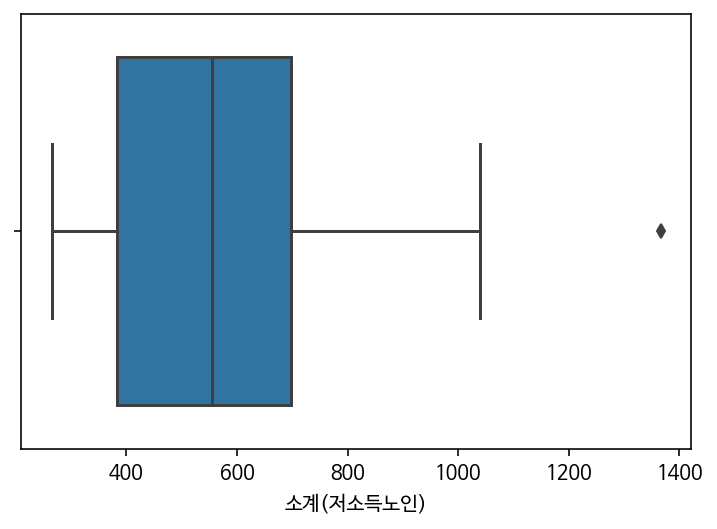

In [ ]:
# box plot
sns.boxplot(x='소계(저소득노인)', data=newhome3)
plt.show() # 이상치 : 중랑 

In [ ]:
q1=newhome3['소계(저소득노인)'].quantile(0.25)
q2=newhome3['소계(저소득노인)'].quantile(0.5)
q3=newhome3['소계(저소득노인)'].quantile(0.75)
iqr=q3-q1

condition= newhome3[('소계(저소득노인)')]>q3+1.5*iqr 
newhome3[condition]  #이상치 확인 

,자치구별,전체소계,전체소계(남자),전체소계(여자),소계(국민기초생활보장 수급권자),소계(국민기초생활보장 수급권자남자),소계(국민기초생활보장 수급권자여자),소계(저소득노인),소계(저소득노인남자),소계(저소득노인여자),소계(일반),소계(일반남자),소계(일반여자)
7,중랑구,19260,6736,12524,7074,2551,4523,1366,376,990,10820,3809,7011


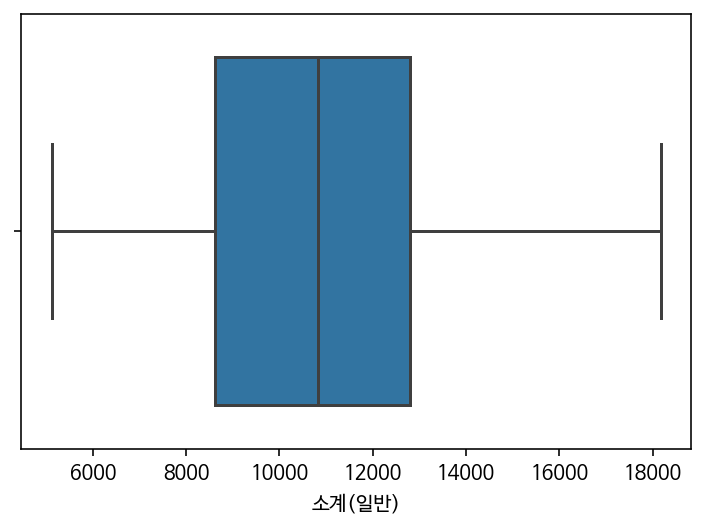

In [ ]:
# box plot
sns.boxplot(x='소계(일반)', data=newhome3)
plt.show() #이상치없음 

In [ ]:
#지도 시각화 
import folium
import json
geo_path= ('/content/seoul_municipalities_geo_simple.json') 
geo_str = json.load(open(geo_path, encoding = 'utf-8'))
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

In [ ]:
seoul_map = folium.Map(location=[37.5502, 126.992],zoom_start=13) #서울 좌표, zoom_start는 확대 기능 
seoul_map #지도 로드 

In [ ]:
#서울 구별 기초생활수급자 노인 
folium.Choropleth(geo_data = geo_str, data= newhome3, columns= ['자치구별','소계(국민기초생활보장 수급권자)'],fill_color = 'OrRd',key_on='feature.properties.name').add_to(seoul_map)
seoul_map # 한강아래 맨 빨간 왼쪽 지역이 강서구  

In [ ]:
#서울 구별 저소득득 노인 
folium.Choropleth(geo_data = geo_str, data= newhome3, columns= ['자치구별','소계(저소득노인)'],fill_color = 'OrRd',key_on='feature.properties.name').add_to(seoul_map)
seoul_map 

In [ ]:
#파일합치기 
df= pd.merge(newhome1,newhome2,  on = '자치구별', how = 'outer')
df= pd.merge(df,newhome3,  on = '자치구별', how = 'outer')
df

,자치구별,전체소계_x,전체소계(남자)_x,전체소계(여자)_x,소계(주택),소계(주택남자),소계(주택여자),소계(주택이외의 거처),소계(주택이외의 거처남자),소계(주택이외의 거처여자),...,전체소계(여자),소계(국민기초생활보장 수급권자),소계(국민기초생활보장 수급권자남자),소계(국민기초생활보장 수급권자여자),소계(저소득노인),소계(저소득노인남자),소계(저소득노인여자),소계(일반),소계(일반남자),소계(일반여자)
0,종로구,27308,13211,14097,21465,10037,11428,5843,3174,2669,...,5188,1839,975,864,337,122,215,6397,2288,4109
1,중구,24544,11654,12890,18406,8370,10036,6138,3284,2854,...,4525,2168,1028,1140,265,67,198,5120,1933,3187
2,용산구,39270,18124,21146,33407,15090,18317,5863,3034,2829,...,7297,2650,1153,1497,345,118,227,8175,2602,5573
3,성동구,44946,22127,22819,39191,19121,20070,5755,3006,2749,...,7587,2985,1129,1856,352,78,274,7894,2437,5457
4,광진구,66140,31456,34684,57695,27549,30146,8445,3907,4538,...,8177,3164,1152,2012,366,80,286,8629,2750,5879
5,동대문구,65290,32424,32866,53204,26265,26939,12086,6159,5927,...,10922,5271,2323,2948,493,132,361,11276,3663,7613
6,중랑구,60487,29812,30675,55974,27372,28602,4513,2440,2073,...,12524,7074,2551,4523,1366,376,990,10820,3809,7011
7,성북구,64985,29018,35967,59090,26245,32845,5895,2773,3122,...,12674,4725,1627,3098,698,163,535,12802,3761,9041
8,강북구,48428,22386,26042,45110,20366,24744,3318,2020,1298,...,16884,5984,2111,3873,1039,237,802,18172,5963,12209
9,도봉구,37853,16789,21064,34349,14861,19488,3504,1928,1576,...,10154,3927,1430,2497,743,193,550,10291,3184,7107


In [ ]:
df.to_csv("데이터2021.csv",index='false', encoding='utf-8-sig')